In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pickle




from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.impute import KNNImputer



In [2]:
df = pd.read_csv("Sri Lankan CKD Dataset.csv")

In [3]:
a= {"M":1,"F":0}

df["gender"]=df["gender"].map(a)

In [4]:
df = df.drop("cru",axis =1)
df = df.drop("ua",axis =1)
df = df.drop("iron",axis =1)

In [5]:
missing_values_per_row = df.isnull().sum(axis=1)

print("Number of Missing Values per Row:")
print(missing_values_per_row)

Number of Missing Values per Row:
0      6
1      2
2      1
3      2
4      2
      ..
401    4
402    0
403    1
404    4
405    1
Length: 406, dtype: int64


In [6]:
threshold = 10
filtered_data = df[missing_values_per_row <= threshold]

print("\nFiltered DataFrame:")
print(filtered_data)
filtered_data.shape

df = filtered_data.copy()



Filtered DataFrame:
      id   age  weight  gender       cr    al    gl     na    ca    k     cl  \
0      1  72.0   52.00       1   249.43  34.9   NaN  142.0  2.43  5.0  113.0   
1      2  76.0   52.00       1   216.05  41.3   NaN  145.0  2.40  4.7  114.0   
2      3  60.0   80.40       1   155.40  33.7   NaN  135.0  2.00  4.2  103.0   
3      4  65.0   53.40       0   127.50  41.8   NaN  138.0  2.80  4.4  100.0   
4      5  59.0   60.40       1   172.71  39.7   NaN  128.0  2.20  3.6   91.0   
..   ...   ...     ...     ...      ...   ...   ...    ...   ...  ...    ...   
401  402  48.0   48.00       1  1167.62   NaN   NaN  134.0   NaN  4.1   94.0   
402  403  46.0   55.00       1   211.20  37.2  37.9  144.0  2.40  4.3  105.0   
403  404  55.0   54.85       0   164.43  22.2  48.9  129.0   NaN  3.9   97.0   
404  405  84.0   43.90       1   501.71   NaN   NaN  135.0   NaN  5.7   99.0   
405  406  38.0   60.50       1   880.64  38.5  32.1  127.0   NaN  4.1   99.0   

       pr   wbc   

In [7]:
df = df[['cr','age','hg','al','gender','na','gl','ca','class']].copy()
# df = df[['age','hg','al','gender','na','gl','ca','class']].copy()

# df = df[['cr','age','hg','gender','na','class']].copy()





In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=14)

# Perform the imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head()

,cr,age,hg,al,gender,na,gl,ca,class
0,249.43,72.0,12.457143,34.9,1.0,142.0,35.721429,2.43,1.0
1,216.05,76.0,11.300000,41.3,1.0,145.0,36.107143,2.40,1.0
2,155.40,60.0,8.400000,33.7,1.0,135.0,36.158571,2.00,1.0
3,127.50,65.0,11.700000,41.8,0.0,138.0,32.994286,2.80,1.0
4,172.71,59.0,13.800000,39.7,1.0,128.0,37.908571,2.20,1.0


In [9]:
# df_imputed = df_imputed.drop(columns='id')

In [10]:
# df_imputed = df_imputed.round(1)
X = df_imputed.drop(columns='class')
y = df_imputed['class']

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# from sklearn.inspection import permutation_importance


In [12]:
# from sklearn.feature_selection import RFE

# model = LogisticRegression(max_iter=1000)

# # Use RFE to select top 2 features
# rfe = RFE(model, n_features_to_select=2)
# fit = rfe.fit(X, y)

# # Print selected features
# selected_features = [feature for feature, selected in zip(X.columns, fit.support_) if selected]
# print(f"Selected Features: {selected_features}")

# # Rank all features
# ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
# print(ranking.sort_values(by='Ranking'))

In [13]:
# # d = df_imputed.round(1)
# d = df_imputed[['ca','gender','hg','al','na','class','cr']]

# X = d.drop(columns='class')
# y = d['class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost Classifier
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.96


In [15]:
# X_train

In [16]:
X_test

,cr,age,hg,al,gender,na,gl,ca
78,85.840,45.0,11.7,37.250000,0.0,133.000000,36.614286,2.453571
371,918.960,63.0,10.9,35.700000,0.0,141.000000,31.642857,2.200000
248,61.894,45.0,15.0,36.120000,0.0,141.000000,43.600000,2.453571
55,130.870,27.0,13.2,38.328571,1.0,136.928571,36.300000,2.248571
390,1167.620,48.0,13.5,35.285714,1.0,134.000000,31.771429,1.985714
...,...,...,...,...,...,...,...,...
364,220.000,34.0,10.1,32.900000,1.0,134.000000,20.200000,2.470000
82,114.920,61.0,10.8,40.377143,0.0,137.428571,33.608571,2.296429
114,530.060,52.0,9.5,30.700000,1.0,125.000000,35.500000,2.117143
3,127.500,65.0,11.7,41.800000,0.0,138.000000,32.994286,2.800000


In [17]:
y_test

78     0.0
371    1.0
248    0.0
55     1.0
390    1.0
      ... 
364    1.0
82     0.0
114    1.0
3      1.0
18     1.0
Name: class, Length: 79, dtype: float64

In [18]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [19]:
incorrect_predictions = X_test[y_pred != y_test]
incorrect_labels = y_test[y_pred != y_test]
predicted_labels = y_pred[y_pred != y_test]

# Combine X_test with the actual and predicted labels for better clarity
incorrect_data = incorrect_predictions.copy()
incorrect_data['Actual Label'] = incorrect_labels
incorrect_data['Predicted Label'] = predicted_labels

incorrect_data

,cr,age,hg,al,gender,na,gl,ca,Actual Label,Predicted Label
356,853.81,56.0,10.400000,35.178571,1.0,133.000000,31.642857,2.192857,0.0,1
56,66.71,60.0,13.942857,39.900000,0.0,140.571429,42.700000,2.453571,1.0,0
386,96.60,65.0,12.000000,40.628571,0.0,140.000000,32.750000,2.453571,1.0,0


In [122]:
# x_ = np.array([716.230,60.0, 84.0,38.800000,	1.0,121.0,31.042857,2.100000,77.000000,4.5])
# x_ = x_.reshape(1, -1)

# # single_instance = np.array([4.5, 2.3, 1.3, 0.2, 3.1])

# # # Reshape it into a 2D array
# # single_instance_reshaped = single_instance.reshape(1, -1)

In [123]:
# import pickle

# # Load the saved XGBoost model
# with open("model_folder/xgboost_ckd_model.pkl", "rb") as file:
#     m = pickle.load(file)

In [124]:
# y_ = m.predict(x_)
# y_

In [125]:
# y_

In [126]:
y_test

78     0.0
371    1.0
248    0.0
55     1.0
390    1.0
      ... 
364    1.0
82     0.0
114    1.0
3      1.0
18     1.0
Name: class, Length: 79, dtype: float64

In [127]:
import os
folder_name = "model_folder"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created.")

# Step 6: Save the model in the new folder
# model_path = os.path.join(folder_name, 'xgboost_ckd_model_no_alglca.pkl')
# model_path = os.path.join(folder_name, 'xgboost_ckd_model.pkl')
model_path = os.path.join(folder_name, 'xgboost_ckd_model_no_scr.pkl')


with open(model_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_path}")

Model saved as model_folder\xgboost_ckd_model_no_scr.pkl


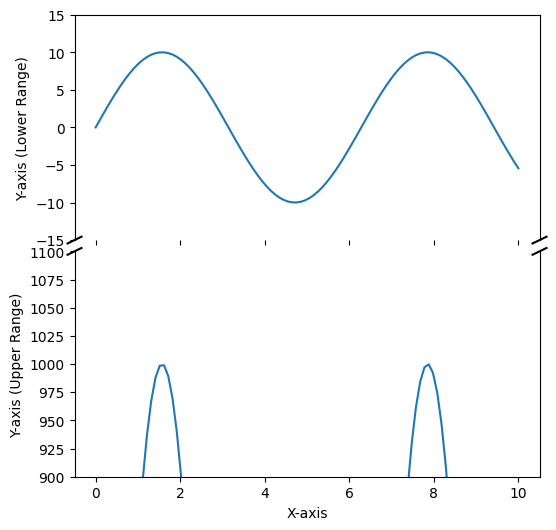

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x) * 10
y2 = np.sin(x) * 1000  # Simulate a large gap between the two ranges

# Create two subplots, one for each segment of the broken axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Adjust spacing between the two subplots
fig.subplots_adjust(hspace=0.05)

# Plot the lower part of the data on the first subplot
ax1.plot(x, y1, label='Lower Range')
ax1.set_ylim(-15, 15)  # Set limits for the lower range

# Plot the upper part of the data on the second subplot
ax2.plot(x, y2, label='Upper Range')
ax2.set_ylim(900, 1100)  # Set limits for the upper range

# Hide the spines between the two subplots
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add the diagonal lines for the broken y-axis effect
ax1.tick_params(labeltop=False)  # Hide x-ticks on the upper plot
ax2.tick_params(labelbottom=True)  # Show x-ticks on the lower plot

# Diagonal lines in the broken axis
d = 0.015  # Size of the diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal for ax1
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal for ax1

kwargs.update(transform=ax2.transAxes)  # Switch to the bottom plot
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal for ax2
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal for ax2

# Label axes
ax2.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis (Lower Range)')
ax2.set_ylabel('Y-axis (Upper Range)')

plt.show()
